In [2]:
import numpy as np

from fl.utils import plot_mnist, apply_patch, vector_to_image_mnist
from fl.preprocessing import load_mnist

2024-04-25 21:01:19.300418: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 21:01:19.303288: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 21:01:19.343538: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 21:01:20.078368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Challenge 3 : Des portes dérobées

![backdoor.jpg](https://i.imgflip.com/8nft1w.jpg)

## Des portes ? 

Le but de ce challenge est d'utiliser les vulnérabilités de l'apprentissage fédéré pour poser une *backdoor* dans le model. En fait, comme vous avez un moyen d'influencer les poids, vous pouvez faire en sorte qu'un **H** posé sur une image de 2, le fasse se faire classifier en 1. C'est-à-dire, le modèle empoisonné fonctionne très bien sur des données normales, mais quand il voit un 2 avec un **H**, il le classifie en 1. 

Je vous propose de découvrir tout ça. 

On considère le patch **H** suivant : 

In [3]:
patch = np.array([
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1]
])
edge = (1, 1)       # Endroit où est placé le coin en haut à gauche du patch sur l'image 

Comme avant, on récupère les données : 

In [4]:
x_train, y_train, x_test, y_test = load_mnist()

On peut ensuite voir ce qu'il se passe quand on applique le patch sur les images : 

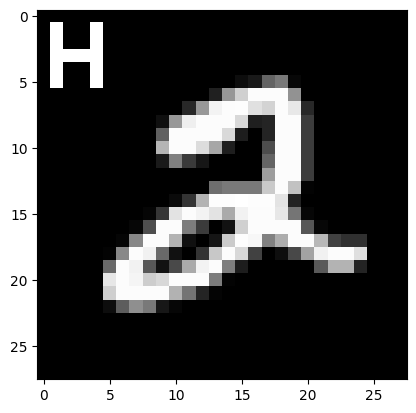

In [5]:
x_adv = apply_patch(x_train[5], patch, edge)
plot_mnist(vector_to_image_mnist(x_adv))

## À vous de jouer !

Trouver un moyen en vous plaçant dans **le même cadre que les deux premiers challenges**, de modifier les poids de telle sorte à ce que : 
- Le modèle commun fonctionne très bien sur les images normales (non patchées), je demande une précision d'au moins 80% (je suis gentil :)
- Dès que le modèle voit un 2 patché, il le classifie en 1. ***Attention, le patch peut se trouver n'importe où.***
- Quand le modèle voit un chiffre autre qu'un 2 patché, il le classifie correctement. 

## Récupération du drapeau

Comme d'habitude, une fois le travail accompli, on envoie nos poids à l'API pour que le serveur puisse agréger le tout. 

In [6]:
model = ...
raise NotImplementedError

NotImplementedError: 

In [ ]:
import requests as rq

URL = "https://du-poison.challenges.404ctf.fr"
rq.get(URL + "/healthcheck").json()
d = weights_to_json(model.get_weights())

In [ ]:
rq.post(URL + "/challenges/3", json=d).json()